[ 0.8360188   0.11314284  0.05083836]


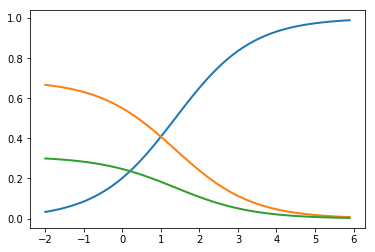

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

scores = [3.0, 1.0, 0.2]

import numpy as np

def softmax(x):
    return np.exp(x)/np.sum(np.exp(x),axis=0)
    """Compute softmax values for each sets of scores in x."""
    pass  # TODO: Compute and return softmax(x)


print(softmax(scores))

# Plot softmax curves
import matplotlib.pyplot as plt
x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])

plt.plot(x, softmax(scores).T, linewidth=2)
plt.show()



In [32]:
#softmax(scores)
#np.exp([3.0, 1.0, 0.2]) / sum(np.exp([3.0, 1.0, 0.2]))
#softmax([3.0, 1.0, 2.0])

In [40]:
scores = np.array([3.0, 1.0, 0.2])

In [41]:
softmax(scores)

array([ 0.8360188 ,  0.11314284,  0.05083836])

In [42]:
softmax(scores*10)


array([  9.99999998e-01,   2.06115362e-09,   6.91440009e-13])

In [43]:
softmax(scores/10)

array([ 0.38842275,  0.31801365,  0.2935636 ])

In [46]:
n = 1000000000
for i in xrange(1000000):
    n += 0.000001
n=n-1000000000
n

0.95367431640625

In [ ]:
# https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/udacity/1_notmnist.ipynb

In [2]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [48]:
url = 'http://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None
data_root = '.' # Change me to store data elsewhere

def download_progress_hook(count, blockSize, totalSize):
  """A hook to report the progress of a download. This is mostly intended for users with
  slow internet connections. Reports every 5% change in download progress.
  """
  global last_percent_reported
  percent = int(count * blockSize * 100 / totalSize)

  if last_percent_reported != percent:
    if percent % 5 == 0:
      sys.stdout.write("%s%%" % percent)
      sys.stdout.flush()
    else:
      sys.stdout.write(".")
      sys.stdout.flush()
      
    last_percent_reported = percent
        
def maybe_download(filename, expected_bytes, force=False):
  """Download a file if not present, and make sure it's the right size."""
  dest_filename = os.path.join(data_root, filename)
  if force or not os.path.exists(dest_filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, dest_filename, reporthook=download_progress_hook)
    print('\nDownload Complete!')
  statinfo = os.stat(dest_filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', dest_filename)
  else:
    raise Exception(
      'Failed to verify ' + dest_filename + '. Can you get to it with a browser?')
  return dest_filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Attempting to download: notMNIST_large.tar.gz
0%....5%....10%....15%....20%....25%....30%....35%....40%....45%....50%....55%....60%....65%....70%....75%....80%....85%....90%....95%....100%
Download Complete!
Found and verified ./notMNIST_large.tar.gz
Attempting to download: notMNIST_small.tar.gz
0%....5%....10%....15%....20%....25%....30%....35%....40%....45%....50%....55%....60%....65%....70%....75%....80%....85%....90%....95%....100%
Download Complete!
Found and verified ./notMNIST_small.tar.gz


In [4]:
from IPython.display import Image

Image(filename='./notMNIST_small/A/MjAwcHJvb2Ztb29uc2hpbmUgcmVtaXgudHRm.png')
Image(filename='./notMNIST_small/B/MDEtMDEtMDAudHRm.png')

In [3]:
from IPython.display import Image, display

listOfImageNames = ['/path/to/images/1.png',
                    '/path/to/images/2.png']

folder ='./notMNIST_small/D'
listOfImageNames = os.listdir(folder)
for imageName in listOfImageNames:
    image_file = os.path.join(folder, imageName)
    display(Image(filename=image_file))

In [49]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall(data_root)
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

Extracting data for ./notMNIST_large. This may take a while. Please wait.
['./notMNIST_large/A', './notMNIST_large/B', './notMNIST_large/C', './notMNIST_large/D', './notMNIST_large/E', './notMNIST_large/F', './notMNIST_large/G', './notMNIST_large/H', './notMNIST_large/I', './notMNIST_large/J']
Extracting data for ./notMNIST_small. This may take a while. Please wait.
['./notMNIST_small/A', './notMNIST_small/B', './notMNIST_small/C', './notMNIST_small/D', './notMNIST_small/E', './notMNIST_small/F', './notMNIST_small/G', './notMNIST_small/H', './notMNIST_small/I', './notMNIST_small/J']


In [50]:
train_folders

['./notMNIST_large/A',
 './notMNIST_large/B',
 './notMNIST_large/C',
 './notMNIST_large/D',
 './notMNIST_large/E',
 './notMNIST_large/F',
 './notMNIST_large/G',
 './notMNIST_large/H',
 './notMNIST_large/I',
 './notMNIST_large/J']

In [83]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, min_num_images_per_class)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

./notMNIST_large/A.pickle already present - Skipping pickling.
./notMNIST_large/B.pickle already present - Skipping pickling.
./notMNIST_large/C.pickle already present - Skipping pickling.
./notMNIST_large/D.pickle already present - Skipping pickling.
./notMNIST_large/E.pickle already present - Skipping pickling.
./notMNIST_large/F.pickle already present - Skipping pickling.
./notMNIST_large/G.pickle already present - Skipping pickling.
./notMNIST_large/H.pickle already present - Skipping pickling.
./notMNIST_large/I.pickle already present - Skipping pickling.
./notMNIST_large/J.pickle already present - Skipping pickling.
./notMNIST_small/A.pickle already present - Skipping pickling.
./notMNIST_small/B.pickle already present - Skipping pickling.
./notMNIST_small/C.pickle already present - Skipping pickling.
./notMNIST_small/D.pickle already present - Skipping pickling.
./notMNIST_small/E.pickle already present - Skipping pickling.
./notMNIST_small/F.pickle already present - Skipping pi

In [100]:
train_datasets[0]

'./notMNIST_large/A.pickle'

In [134]:
os.listdir('notMNIST_small/A/')

['QnJpZGdld29ya0EudHRm.png',
 'Q2hlbHRlbmhhbS1VbHRyYUNvbmQub3Rm.png',
 'QW1lcmljYW5HYXJhbW9uZEJULUl0YWxpYy5vdGY=.png',
 'RFRMQXJnb1NULUJsYWNrLm90Zg==.png',
 'Q29udGV4dCBSZXByaXNlIE1lZGl1bSBTU2kgTWVkaXVtLnR0Zg==.png',
 'QXBvbGxvIFJlZ3VsYXIudHRm.png',
 'RW5naW5lLUNhcHNJdGFsaWMub3Rm.png',
 'QW1lcmljYW5UeXBld3JpdGVyQlEtQm9sZEl0YWxpYy5vdGY=.png',
 'RnJpelF1YWRyYXRhSVRDYnlCVC1Cb2xkLm90Zg==.png',
 'RGVsdGEtQ29uZGVuc2VkTm9ybWFsLnR0Zg==.png',
 'Q29tc2F0LU5hdnktVW5pdC5vdGY=.png',
 'RXllY2hhcnQgUmVndWxhci50dGY=.png',
 'Qmxpc3MgRXh0ZW5kZWQgTm9ybWFsLnR0Zg==.png',
 'RnV0dXJpc0V4dHJhIEN5cmlsbGljQC50dGY=.png',
 'QWdlbmN5RkItQm9sZENvbmRlbnNlZC5vdGY=.png',
 'QmFyY2xheSBPcGVuLnR0Zg==.png',
 'RGFudGVNVFN0ZC1JdGFsaWMub3Rm.png',
 'Q2hhbnRpbGx5LU1lZGl1bS5vdGY=.png',
 'QW1lcmlnbyBCVCBCb2xkIEl0YWxpYy50dGY=.png',
 'R2Fkem9veEJvbGQub3Rm.png',
 'QmVuZ3VpYXRDb25kZW5zZWRCUS1Cb29rSXRhbGljLm90Zg==.png',
 'QXJpYWxNVFN0ZC5vdGY=.png',
 'Q2xlYXJmYWNlR290aGljTFQtQmxhY2sub3Rm.png',
 'R291ZHkgTW9kZXJuIE1ULnR0Zg==.png',
 'Q2

In [132]:
from IPython.display import display, Image

display(Image(filename="notMNIST_small/A/Q0NXaWxkV29yZHMtQm9sZEl0YWxpYy50dGY=.png"))

In [112]:
def letter(i):
    return 'abcdefghij'[i]
for label, p in enumerate(train_datasets):
#for p in train_datasets:
    with open(p, 'rb') as f:
        letter_set = pickle.load(f)
        print(letter(label)+ str(letter_set.shape))

a(52909, 28, 28)
b(52911, 28, 28)
c(52912, 28, 28)
d(52911, 28, 28)
e(52912, 28, 28)
f(52912, 28, 28)
g(52912, 28, 28)
h(52912, 28, 28)
i(52912, 28, 28)
j(52911, 28, 28)


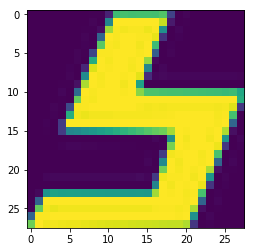

In [116]:
plt.imshow(letter_set[52910])

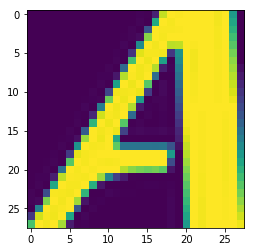

In [136]:
pickle_file = train_datasets[0]  # index 0 should be all As, 1 = all Bs, etc.
with open(pickle_file, 'rb') as f:
    letter_set = pickle.load(f)  # unpickle
    sample_idx = np.random.randint(len(letter_set))  # pick a random image index
    sample_image = letter_set[sample_idx, :, :]  # extract a 2D slice
    plt.figure()
    plt.imshow(sample_image)  # display it

In [135]:
#image_data = (ndimage.imread(image_file).astype(float) - pixel_depth / 2) / pixel_depth

In [114]:
def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.int32)
  else:
    dataset, labels = None, None
  return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
  num_classes = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, image_size)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  vsize_per_class = valid_size // num_classes
  tsize_per_class = train_size // num_classes
    
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for label, pickle_file in enumerate(pickle_files):       
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letter_set)
        if valid_dataset is not None:
          valid_letter = letter_set[:vsize_per_class, :, :]
          valid_dataset[start_v:end_v, :, :] = valid_letter
          valid_labels[start_v:end_v] = label
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = letter_set[vsize_per_class:end_l, :, :]
        train_dataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


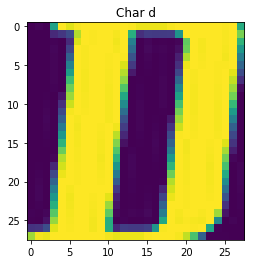

In [94]:
#define a function to conver label to letter
def letter(i):
    return 'abcdefghij'[i]
# you need a matplotlib inline to be able to show images in python notebook
%matplotlib inline
#some random number in range 0 - length of dataset
sample_idx = np.random.randint(0, len(train_dataset))
#now we show it
plt.imshow(train_dataset[sample_idx])
plt.title("Char " + letter(train_labels[sample_idx]))

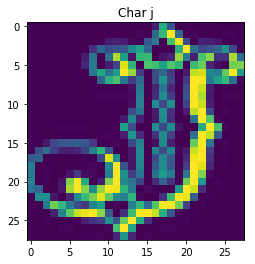

In [118]:
sample_idx = np.random.randint(0, len(valid_dataset))
plt.imshow(valid_dataset[sample_idx])
plt.title("Char " + letter(valid_labels[sample_idx]))

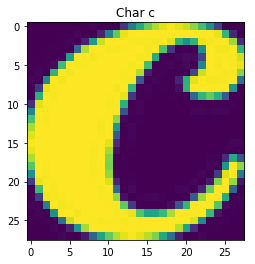

In [119]:
sample_idx = np.random.randint(0, len(test_dataset))
plt.imshow(test_dataset[sample_idx])
plt.title("Char " + letter(test_labels[sample_idx]))

In [96]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

In [97]:
pickle_file = os.path.join(data_root, 'notMNIST.pickle')

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [98]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690800441


In [127]:
train_set =[]
for img in train_dataset:
    train_set.append(img.flatten())

test_set =[]
for img in test_dataset:
    test_set.append(img.flatten())

valid_set =[]
for img in valid_dataset:
    valid_set.append(img.flatten())

In [129]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_set, train_labels)

# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [  1.75662773e-01  -4.11022769e-02   4.86297210e-02  -1.81464592e-02
  -6.88295302e-02   3.73358598e-02   1.00115313e-02   8.46964076e-02
  -1.31804647e-01   4.74267006e-02   1.34165031e-01  -1.55467547e-01
   7.14373950e-02  -3.64514402e-01  -8.50526867e-02  -3.29399235e-02
  -1.85392400e-01   3.69702328e-02  -1.87401998e-01   2.07526888e-02
  -6.59411384e-02  -3.51775922e-02   3.52204476e-02   1.81147605e-01
   5.14094335e-01   6.47374775e-01   1.12144577e+00   9.03671474e-01
   4.35461068e-02   1.98410946e-01   2.30939106e-01  -1.23245326e-01
  -8.76910707e-02   1.29298638e-01  -6.35421774e-02   1.06367900e-01
   6.95890465e-03   5.93225725e-02  -9.62247151e-02   1.49812007e-01
   2.79485190e-02  -1.29682803e-01  -5.54310538e-01   1.71029861e-01
  -8.75133859e-02  -9.39727667e-02   5.54839034e-02  -6.52175658e-02
  -2.96010932e-02   3.22412671e-01   9.52629147e-02   2.62195457e-01
   1.96329032e-03   1.80119371e-01  -2.79748133e-01  -5.16210279e-01
  -7.05951240e-02 

In [130]:
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(test_set) - test_labels) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_set, test_labels))


Mean squared error: 2.94
Variance score: 0.64


In [138]:
len(train_set)

200000

In [143]:
28*28*10+10


7850

In [140]:
2*28

56